C:\Users\Nihal\AppData\Local\Temp\ipykernel_18884\1043758241.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


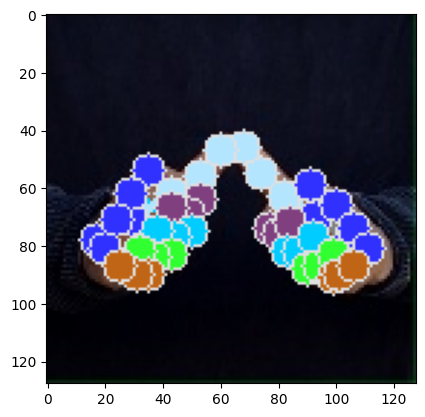

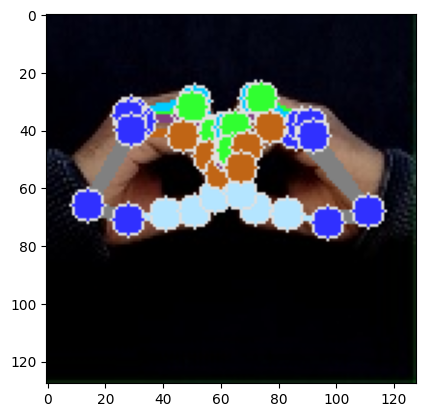

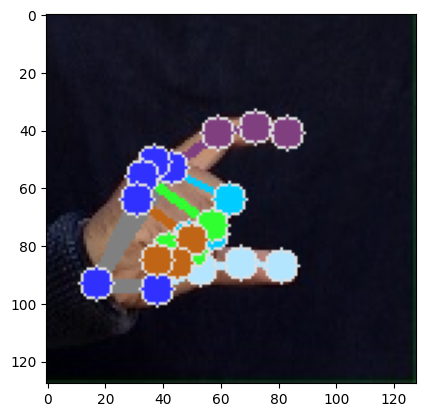

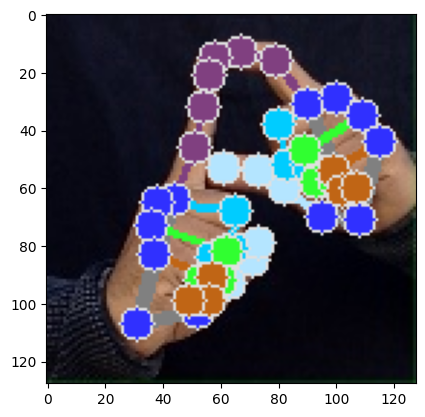

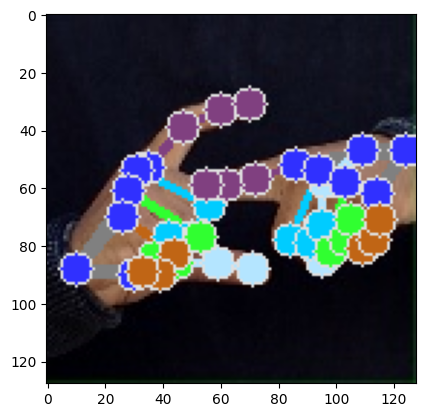

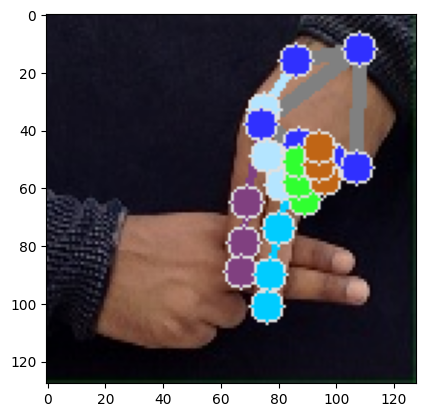

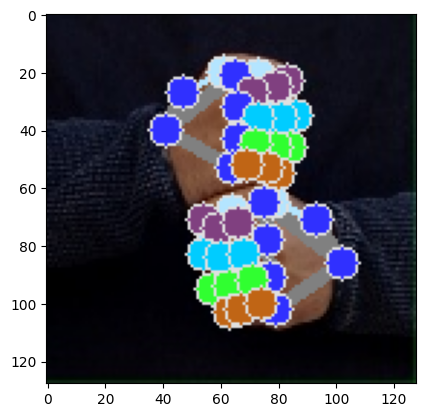

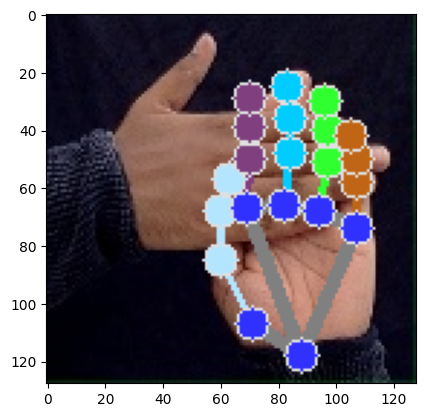

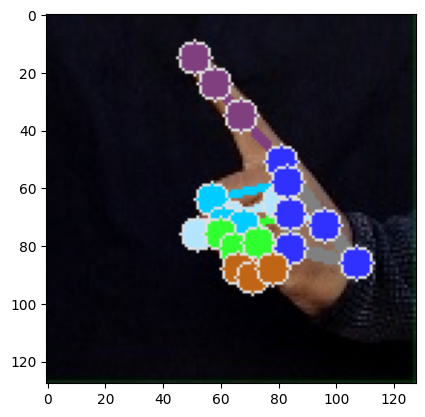

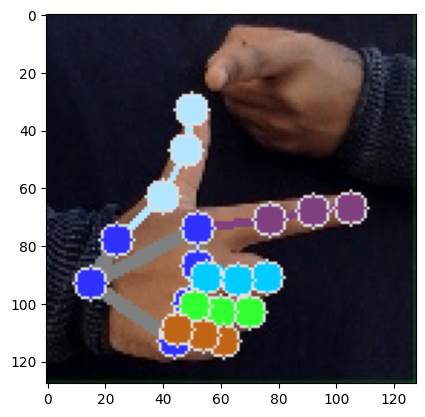

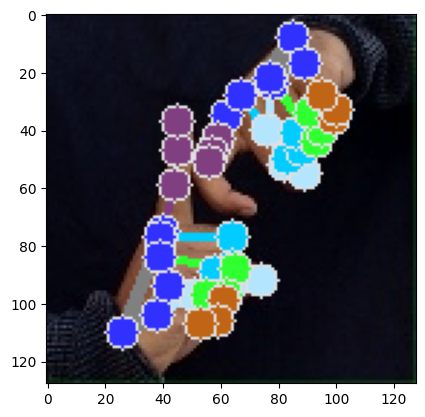

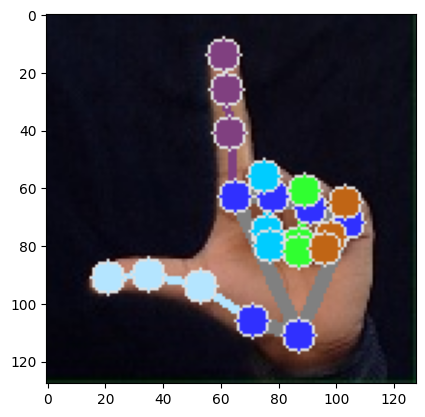

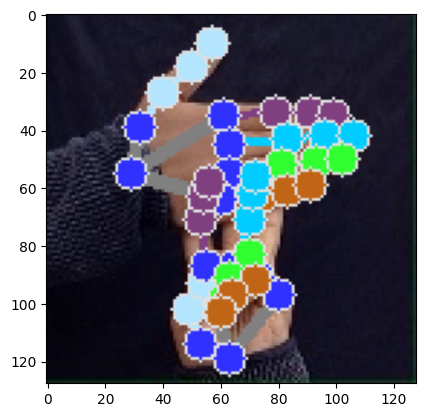

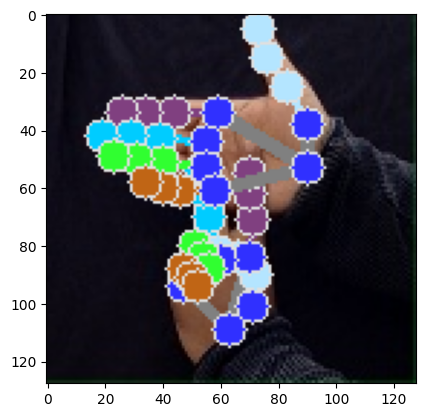

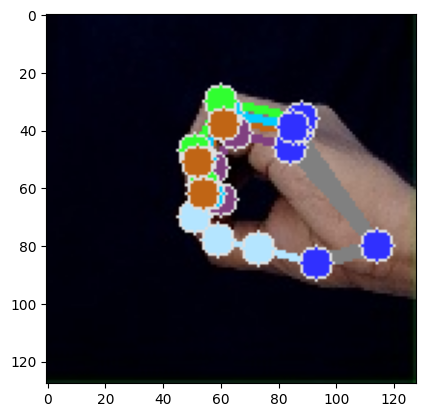

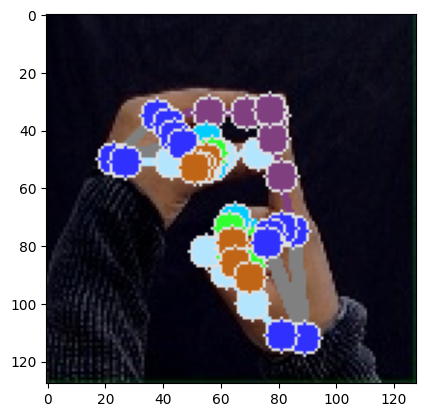

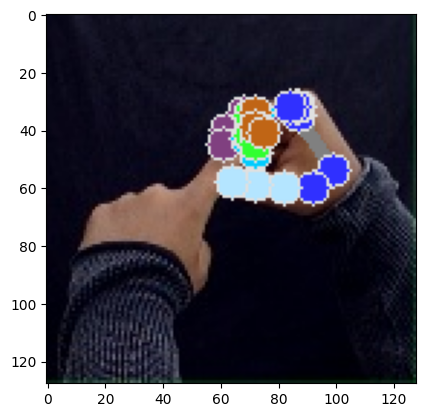

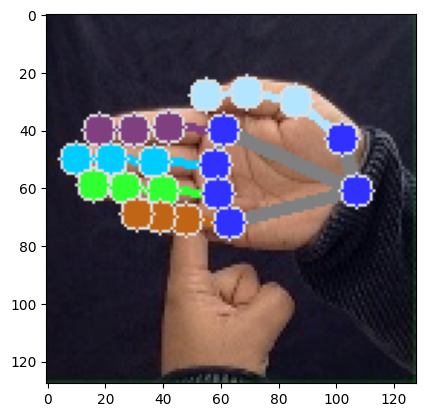

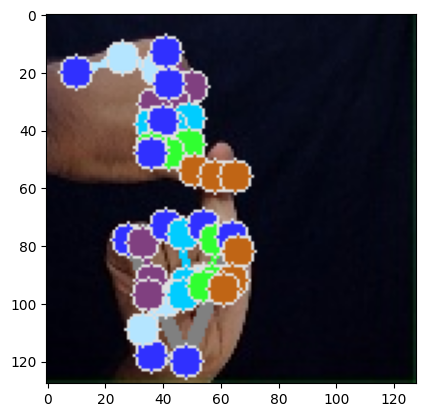

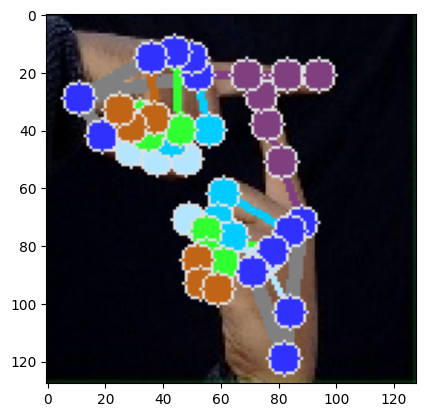

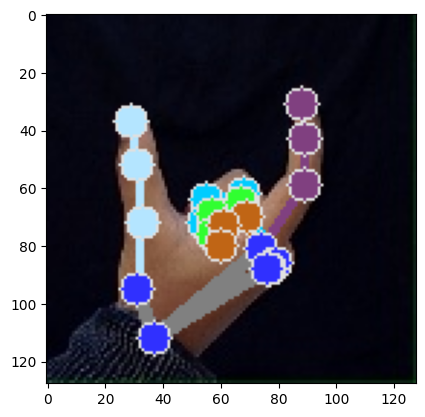

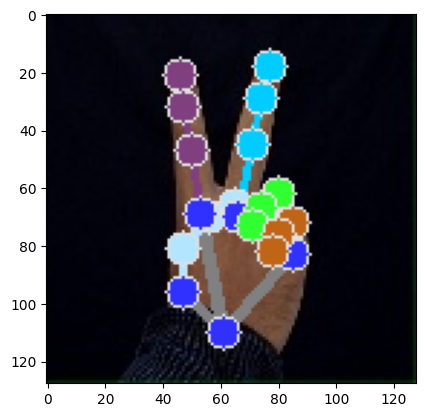

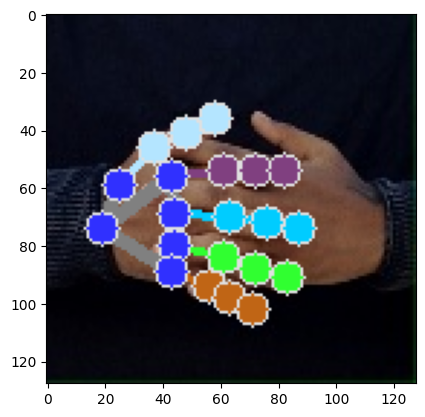

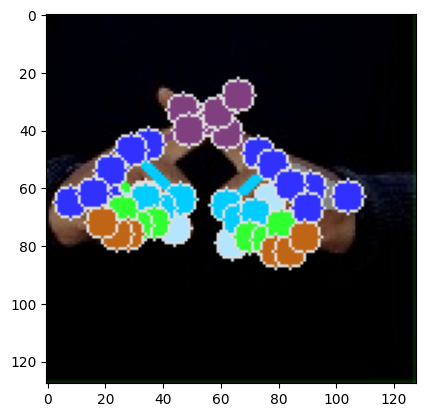

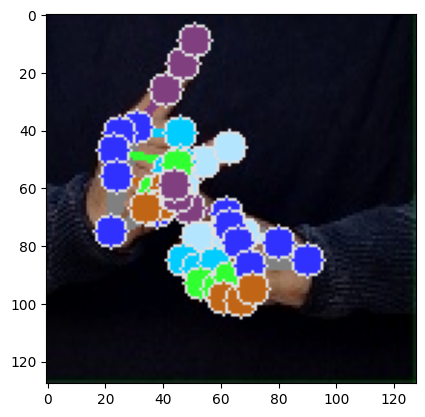

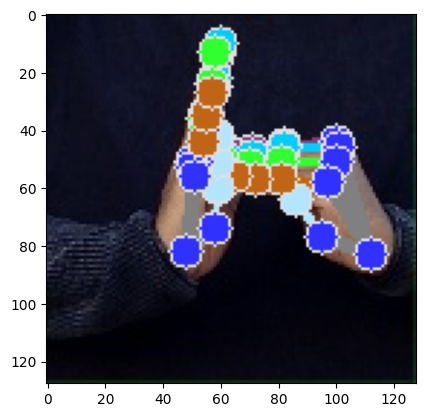

In [2]:
#!pip install mediapipe
import os

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp. solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
data_dir = r'C:\Users\Nihal\Desktop\M_Project\Data'

for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_))[:1]:
        img = cv2.imread(os.path.join(data_dir,dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
            
        plt.figure()
        plt.imshow(img_rgb)

In [3]:
!pip cache purge


Files removed: 60


In [4]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp. solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
data_dir = r'C:\Users\Nihal\Desktop\M_Project\Data'
data = []
labels = []
for dir_ in os.listdir(data_dir):
    for img_path in os.listdir(os.path.join(data_dir, dir_)):
        data_aux = []
        img = cv2.imread(os.path.join(data_dir,dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()            

In [5]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [6]:
data_dic = pickle.load(open('data.pickle', 'rb'))
# print(data_dic.keys)
# print(data_dic)
# print([type(x) for x in data_dic])
data_mod = [float(x) if isinstance(x, str) and x.isnumeric() else x for x in data_dic['data']]


In [7]:
max_length = max(len(x) for x in data_dic['data'] if isinstance(x, (list, np.ndarray)))
padded_data = [np.pad(x, (0, max_length - len(x)), constant_values=0) for x in data_dic['data']]
data = np.array(padded_data)
labels = np.asarray(data_dic['labels'])

In [8]:
print([type(x) for x in labels])

[<class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'n

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)
model = RandomForestClassifier()

In [12]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_predict, y_test)
print('{}% of samples classified'.format(score*100))

100.0% of samples classified


In [13]:
f = open('indian_model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()